# Лабораторная работа № 1
### Боровских Вадим, 932003


## A) Бинарный Классификатор  bank-additional-full

#### Импорт необходимых библиотек и чтение CSV-файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, accuracy_score


#### Вывод структуры датафрейма

In [39]:
df = pd.read_csv("bank-additional-full.csv",sep=";", quotechar='"', index_col = 0)
df=df.reset_index() 
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


####  Возвращает названия всех столбцов в DataFrame

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Возвращает основную информации о DataFrame для определения, есть ли нулевые значения

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Возвращает уникальные значения

In [42]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

#### Подсчет количества значений

In [43]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### Перекодировка целевого столбца в бинарные значения и удаление исходного столбца:

In [44]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [45]:
risk_dictionary_binary_class = {'married': 1, 'single': 0, 'divorced': 0, 'unknown': 0}
df['Marital Binary'] = df['marital'].map(risk_dictionary_binary_class)

df[['marital','Marital Binary']].head(41188)

,marital,Marital Binary
0,married,1
1,married,1
2,married,1
3,married,1
4,married,1
...,...,...
41183,married,1
41184,married,1
41185,married,1
41186,married,1


In [46]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [47]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Default Binary'] = df['default'].map(risk_dictionary_binary_class)

df[['default','Default Binary']].head(41188)

,default,Default Binary
0,no,0
1,unknown,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,no,0
41184,no,0
41185,no,0
41186,no,0


In [48]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [49]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Housing Binary'] = df['housing'].map(risk_dictionary_binary_class)

df[['housing','Housing Binary']].head(41188)

,housing,Housing Binary
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,yes,1
41186,no,0


In [50]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [51]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Loan Binary'] = df['loan'].map(risk_dictionary_binary_class)

df[['loan','Loan Binary']].head(41188)

,loan,Loan Binary
0,no,0
1,no,0
2,no,0
3,no,0
4,yes,1
...,...,...
41183,no,0
41184,no,0
41185,no,0
41186,no,0


In [52]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [53]:
risk_dictionary_binary_class = {'success': 2,'failure': 0, 'nonexistent': 1}
df['Poutcome Binary'] = df['poutcome'].map(risk_dictionary_binary_class)

df[['poutcome','Poutcome Binary']].head(41188)

,poutcome,Poutcome Binary
0,nonexistent,1
1,nonexistent,1
2,nonexistent,1
3,nonexistent,1
4,nonexistent,1
...,...,...
41183,nonexistent,1
41184,nonexistent,1
41185,nonexistent,1
41186,nonexistent,1


#### Перекодировка целевого столбца 'y' в бинарные значения и удаление исходного столбца 'y':

In [54]:
risk_dictionary_binary_class = {'yes': 1, 'no': 0}
df['Target Binary'] = df['y'].map(risk_dictionary_binary_class)

df[['y','Target Binary']].head(41188)

,y,Target Binary
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,no,0
41186,yes,1


In [55]:
X = df.drop(['y','job','education','marital','education','default','housing','loan','month','contact','day_of_week','poutcome','Target Binary'],axis=1)
y = df['Target Binary']

In [56]:
print(y.isnull().sum())

0


In [57]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Marital Binary,Default Binary,Housing Binary,Loan Binary,Poutcome Binary
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1


#### Преобразование категориальных данных с помощью get_dummies и масштабирование данных:

In [58]:
#X_encoded = pd.get_dummies(X)
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

#### Разделение данных на тренировочный, тестовый и валидационный наборы:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (32950, 15), Test : (8238, 15)


In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (26360, 15), Test : (6590, 15)


#### Обучение модели с использованием Keras. Создание модели нейронной сети, ее компиляция:

In [560]:

binary_classifier = Sequential()
binary_classifier.add(Dense(units=4,activation='relu',input_dim=15))
binary_classifier.add(Dense(units=1,activation='sigmoid'))

In [561]:
binary_classifier.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 4)                 64        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69 (276.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [562]:
binary_classifier.compile(loss='binary_crossentropy',optimizer='adam',
                          metrics='accuracy')

In [563]:

early_stop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',verbose=1)
checkpoint = ModelCheckpoint('C:/Users/vvadi/DeepLearning/Binary_Classifier-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

#### Обучение модели

In [567]:
binary_classifier_history = binary_classifier.fit(X_train, y_train, batch_size=10,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=25)


Epoch 1/25
2631/2636 [============================>.] - ETA: 0s - loss: 0.3972 - accuracy: 0.8901
Epoch 1: val_accuracy did not improve from 0.90941
2636/2636 [==============================] - 12s 5ms/step - loss: 0.3976 - accuracy: 0.8899 - val_loss: 0.9977 - val_accuracy: 0.6574
Epoch 2/25
2629/2636 [============================>.] - ETA: 0s - loss: 0.3506 - accuracy: 0.8910
Epoch 2: val_accuracy did not improve from 0.90941
2636/2636 [==============================] - 12s 4ms/step - loss: 0.3504 - accuracy: 0.8910 - val_loss: 0.3604 - val_accuracy: 0.8979
Epoch 3/25
2633/2636 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8901
Epoch 3: val_accuracy did not improve from 0.90941
2636/2636 [==============================] - 12s 4ms/step - loss: 0.3732 - accuracy: 0.8901 - val_loss: 0.3819 - val_accuracy: 0.8982
Epoch 4/25
2633/2636 [============================>.] - ETA: 0s - loss: 0.3633 - accuracy: 0.8927
Epoch 4: val_accuracy did not improve from 0.90941
26

#### Построение графика потери

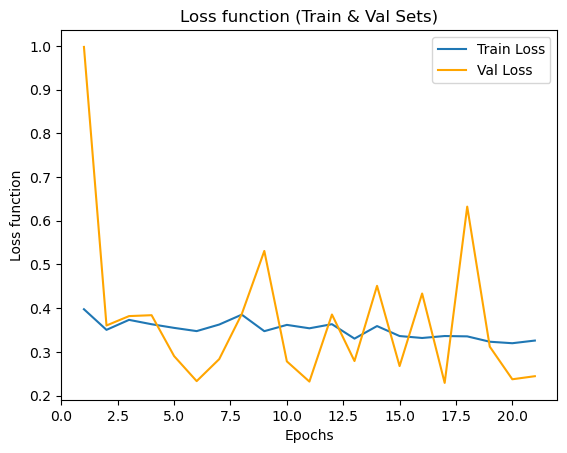

In [568]:
loss_function = binary_classifier_history.history['loss']
val_loss_function = binary_classifier_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

#### Построение графика точности в процессе обучения

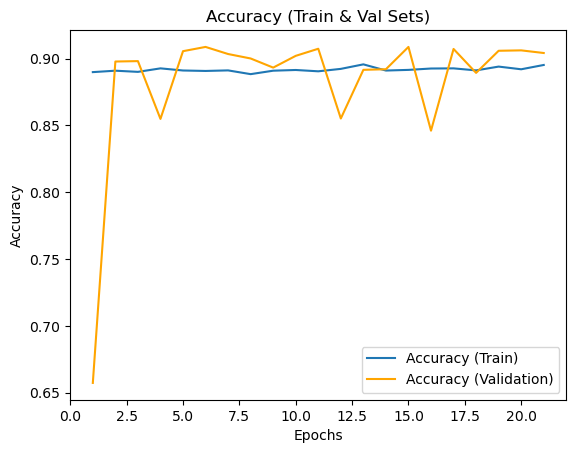

In [569]:
acc = binary_classifier_history.history['accuracy']
val_acc = binary_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Тестирование модели на тестовых данных и предсказание класса для конкретного образца:

In [570]:

# load a saved model
#from keras.models import load_model
#saved_model = load_model('best_model.h5')
binary_classifier.load_weights('C:/Users/vvadi/DeepLearning/Binary_Classifier-11-0.909.hdf5')

In [571]:
results = binary_classifier.evaluate(X_test,y_test)

258/258 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.9068


In [572]:
#x_test_pattern = X_test[1,:]
#y_pred = binary_classifier.predict(x_test_pattern.reshape(1,-1))
x_test_pattern = X_test.iloc[1]
x_test_pattern = x_test_pattern.values.reshape(1,-1)
y_pred = binary_classifier.predict(x_test_pattern)
print(y_pred[0])

1/1 [==============================] - 0s 104ms/step
[0.00020077]


In [573]:
y_test

17589    0
3158     0
2118     0
12435    0
13939    0
        ..
33427    0
32280    0
25947    0
13050    0
39975    1
Name: Target Binary, Length: 8238, dtype: int64

In [574]:
print(x_test_pattern)

[[ 5.2000e+01  3.6000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00
   9.3994e+01 -3.6400e+01  4.8600e+00  5.1910e+03  1.0000e+00  0.0000e+00
   1.0000e+00  0.0000e+00  1.0000e+00]]


#### Возврат особенностей тестового набора данных к их исходному масштабу:

In [575]:
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
original_features

array([[ 4.22900000e+03,  1.77048000e+05,  5.60000000e+01,
         9.98001000e+05,  0.00000000e+00,  1.88000000e+00,
         3.33389604e+02, -9.20760000e+02,  2.20714600e+01,
         1.37798310e+06,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.00000000e+00]])

In [577]:
# Делаем предсказания
y_pred = binary_classifier.predict(X_test)
#y_pred = np.round(y_pred)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)


# Вычисляем метрики
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Вычисляем accuracy для каждого класса и получаем средневзвешенное значение
cm = confusion_matrix(y_test, y_pred)
class_wise = cm.diagonal()/cm.sum(axis=1)
weighted_accuracy = np.average(class_wise, weights=cm.sum(axis=1))

print(f"Recall: {recall}\nPrecision: {precision}\nAUC: {auc}\nWeighted Accuracy: {weighted_accuracy}")

258/258 [==============================] - 1s 3ms/step
Recall: 0.3394396551724138
Precision: 0.6702127659574468
AUC: 0.6591179124015284
Weighted Accuracy: 0.9067734887108522


#### Расчет значений для ROC-кривой и AUC

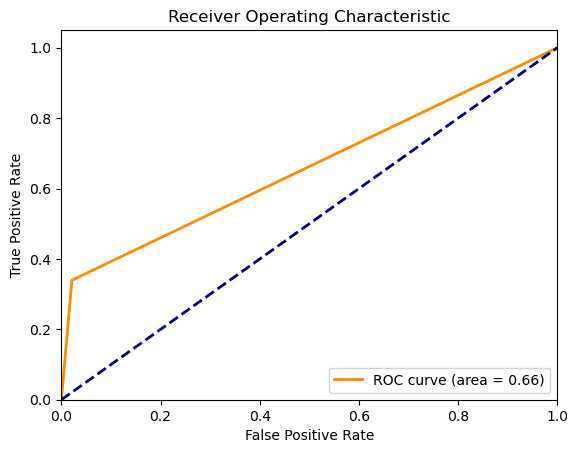

    Recall  Precision       AUC  Weighted Accuracy
0  0.33944   0.670213  0.659118           0.906773


In [578]:
# Расчет значений для ROC-кривой и AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Отображение ROC-кривой
plt.show()

# Отображение метрик в виде датафрейма
metrics_df = pd.DataFrame(data={"Recall": [recall], "Precision": [precision], "AUC": [auc], "Weighted Accuracy": [weighted_accuracy]})
print(metrics_df.head())

## B) Многоклассовый классификатор  fetal_health.csv


In [3]:
df = pd.read_csv("fetal_health.csv", quotechar='"', index_col = 0)
df=df.reset_index() 
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [6]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Перекодировка целевого столбца 'fetal_health' в бинарные значения и удаление исходного столбца 'fetal_health':

In [8]:
risk_dictionary_multi_class = {2: 2, 1:1, 3:3}

df['Target Multi'] = df['fetal_health'].map(risk_dictionary_multi_class)



In [9]:
df[['fetal_health','Target Multi']].head()

,fetal_health,Target Multi
0,2.0,2
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


In [10]:
Xmc = df.drop(['fetal_health','Target Multi'],axis=1)
y = df['Target Multi']
y

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: Target Multi, Length: 2126, dtype: int64

In [11]:
print(y.isnull().sum())

0


#### Преобразование категориальных данных с помощью get_dummies и масштабирование данных:


In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
Xmc = min_max_scaler.fit_transform(Xmc)

In [17]:
from sklearn.model_selection import train_test_split
X_all_train, X_test, y_all_train, y_test = train_test_split(Xmc, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_all_train.shape}, Test : {X_test.shape}')

Train : (1700, 21), Test : (426, 21)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, 
                                                  stratify=y_all_train, test_size = 0.2, 
                                                  random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (1360, 21), Test : (340, 21)


In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [20]:
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

y_train shape: (1360, 4)
y_val shape: (340, 4)
y_test shape: (426, 4)


In [21]:
multi_classifier = Sequential()
multi_classifier.add(Dense(8,activation='relu',input_dim=21))
multi_classifier.add(Dense(4,activation='softmax'))

In [22]:
multi_classifier.compile(loss='categorical_crossentropy',optimizer='adam',
                          metrics='accuracy')

early_stop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',verbose=1)
checkpoint = ModelCheckpoint('C:/Users/vvadi/DeepLearning/multi_classifier-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [23]:
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=20,
                      validation_data=(X_val,y_val), epochs=2)

Epoch 1/2
68/68 [==============================] - 3s 15ms/step - loss: 1.2362 - accuracy: 0.4456 - val_loss: 1.0710 - val_accuracy: 0.7824
Epoch 2/2
68/68 [==============================] - 1s 8ms/step - loss: 0.9286 - accuracy: 0.7816 - val_loss: 0.8118 - val_accuracy: 0.7794


#### Построение графика потери

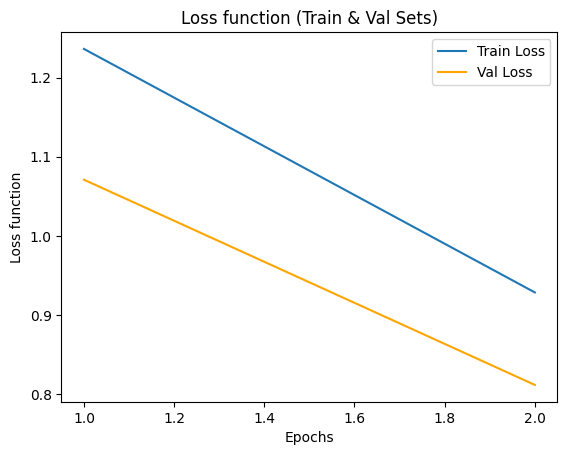

In [24]:
loss_function = multi_classifier_history.history['loss']
val_loss_function = multi_classifier_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

#### Построение графика точности

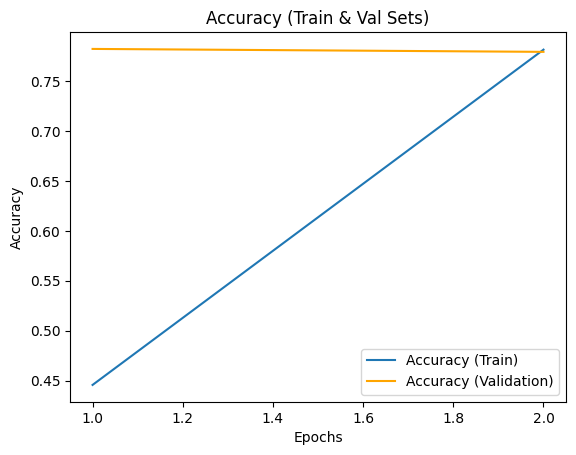

In [25]:
acc = multi_classifier_history.history['accuracy']
val_acc = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
print(y_test[4])

[0. 1. 0. 0.]


In [27]:
x_test_pattern = X_test[4,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)

y_pred = multi_classifier.predict(x_test_pattern.reshape(1,-1))


[[ 1.27e+02  0.00e+00  0.00e+00  6.00e-03  0.00e+00  0.00e+00  0.00e+00
   2.40e+01  1.70e+00  0.00e+00  1.58e+01  9.10e+01  1.07e+02  1.98e+02
   9.00e+00  0.00e+00  1.35e+02  1.36e+02  1.38e+02  7.00e+00 -1.00e+00]]
1/1 [==============================] - 0s 257ms/step


In [28]:
from sklearn.preprocessing import label_binarize
import numpy as np

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

In [31]:
X = Xmc
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.2, random_state=0)
print('Shape of X:', X.shape)
print('Shape of y_bin:', y_bin.shape)

Shape of X: (2126, 21)
Shape of y_bin: (2126, 3)


In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


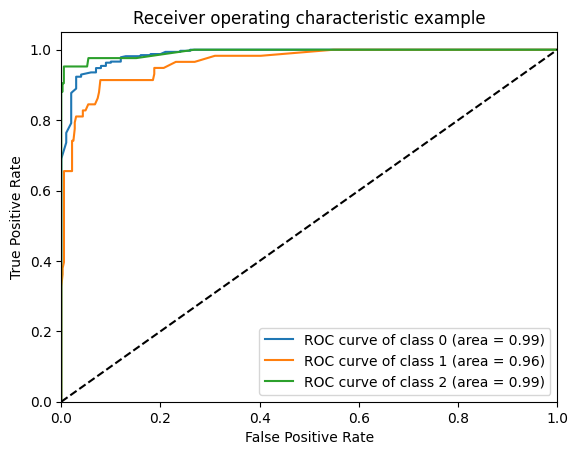

In [33]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 


# Plot ROC кривые
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Добавление случайной диагонали
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_pred = (y_score == y_score.max(axis=1)[:,None]).astype(int)

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, y_score, multi_class='ovr')

print("Precision: ", precision)
print("Recall: ", recall)
print("AUC: ", auc)

accuracy = accuracy_score(y_test, y_pred)
print("Weighted Accuracy: ", accuracy)

Precision:  0.9372018687519258
Recall:  0.9389671361502347
AUC:  0.9827436542449756
Weighted Accuracy:  0.9389671361502347


## B) Регрессор  DS_2019_public.csv


In [582]:
df = pd.read_csv("DS_2019_public.csv", index_col=0, encoding='cp1252', dtype={col: 'str' for col in [30,56,96,114]})
df=df.reset_index() 
df

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,4,5,13,345.8,346,2695.625,9197.516,9198,820,26863,...,8,7179,5,264.409,264,7,0,0,5,2061.159
10871,1,3,9,13.005,13,97.497,332.665,333,521,49610,...,4,6471,6,75.569,76,5,0,1,5,566.544
10872,1,4,10,97.67,98,847.734,2892.504,2893,591,70626,...,-2,24391,6,250.313,250,8,0,1,1,2172.621
10873,1,8,23,12.834,13,135.687,462.975,463,432,49821,...,0,12416,6,175.135,175,5,0,1,1,1851.648


In [453]:
df.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [454]:
df.dtypes

Climate_Region_Pub      int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
DOLELCOL               object
TOTALDOLCOL             int64
                       ...   
HEATROOM                int64
WDWATER                 int64
UGWARM                  int64
DRYRFUEL                int64
KWHRFG                float64
Length: 121, dtype: object

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(34), int64(79), object(8)
memory usage: 10.0+ MB


In [456]:
df.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,...,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,...,14.406053,2.346643,13733.416871,2.775507,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-2.000000,-9.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,0.000000,...,62.000000,0.000000,7708.000000,2.000000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,0.000000,...,67.000000,0.000000,12761.000000,5.000000,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,1.000000,...,70.000000,2.000000,21169.500000,5.000000,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,1.000000,...,90.000000,40.000000,284130.000000,8.000000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [457]:
# Удалите строки с некорректными значениями
df = df[~df.apply(lambda row: row.astype(str).str.contains('[^0-9.]').any(), axis=1)]
# Затем выполните масштабирование
X = df.drop(['TOTALBTUCOL'], axis=1)
y = df['TOTALBTUCOL']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Разделение данных на обучающую и тестовую выборки


In [458]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
print(f'Train : {X_train_val.shape}, Test : {X_test.shape}')
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (3976, 120), Test : (995, 120)
Train : (3180, 120), Test : (796, 120)


### Построение модели


In [459]:
regressor = Sequential()
regressor.add(Dense(120, activation='relu', input_dim=X_train.shape[1]))
regressor.add(Dense(60,activation='relu'))
regressor.add(Dense(1,activation='linear'))
regressor.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 120)               14520     
                                                                 
 dense_31 (Dense)            (None, 60)                7260      
                                                                 
 dense_32 (Dense)            (None, 1)                 61        
                                                                 
Total params: 21841 (85.32 KB)
Trainable params: 21841 (85.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [460]:
regressor.compile(loss='mse', optimizer='adam', metrics='mae')

In [461]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)
checkpoint = ModelCheckpoint('regressor_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
monitor='val_loss', verbose=1, mode='min', save_best_only=True)
callbacks_list = [early_stop, checkpoint]

### Обучение модели


In [472]:
regressor_history = regressor.fit(X_train, y_train, batch_size=40, validation_data=(X_val, y_val),
callbacks=callbacks_list, epochs=350)

Epoch 1/350
77/80 [===========================>..] - ETA: 0s - loss: 91278.9297 - mae: 187.5296
Epoch 1: val_loss improved from 112037.89844 to 110961.00781, saving model to regressor_weights-01-110961.008.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 93335.1953 - mae: 188.9299 - val_loss: 110961.0078 - val_mae: 192.2324
Epoch 2/350
37/80 [============>.................] - ETA: 0s - loss: 111582.8203 - mae: 193.1280

D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/80 [==========================>...] - ETA: 0s - loss: 93507.2188 - mae: 188.4443
Epoch 2: val_loss did not improve from 110961.00781
80/80 [==============================] - 0s 6ms/step - loss: 91154.9609 - mae: 186.7402 - val_loss: 111134.6016 - val_mae: 190.9393
Epoch 3/350
74/80 [==========================>...] - ETA: 0s - loss: 90683.5781 - mae: 183.6870
Epoch 3: val_loss improved from 110961.00781 to 107803.92188, saving model to regressor_weights-03-107803.922.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 89651.3828 - mae: 183.3923 - val_loss: 107803.9219 - val_mae: 190.8004
Epoch 4/350
72/80 [==========================>...] - ETA: 0s - loss: 92634.1953 - mae: 189.5911
Epoch 4: val_loss did not improve from 107803.92188
80/80 [==============================] - 0s 6ms/step - loss: 91709.5938 - mae: 190.2122 - val_loss: 108811.4766 - val_mae: 194.6760
Epoch 5/350
71/80 [=========================>....] - ETA: 0s - loss: 83201.6641 - mae: 181.6792
Epoch 5: val_

Epoch 29/350
76/80 [===========================>..] - ETA: 0s - loss: 60228.4961 - mae: 158.5754
Epoch 29: val_loss did not improve from 84026.20312
80/80 [==============================] - 0s 6ms/step - loss: 65239.8711 - mae: 160.1416 - val_loss: 99741.9062 - val_mae: 217.1865
Epoch 30/350
75/80 [===========================>..] - ETA: 0s - loss: 64945.3086 - mae: 161.0253
Epoch 30: val_loss did not improve from 84026.20312
80/80 [==============================] - 0s 6ms/step - loss: 64324.3711 - mae: 160.1244 - val_loss: 90627.0156 - val_mae: 186.1494
Epoch 31/350
73/80 [==========================>...] - ETA: 0s - loss: 63500.0703 - mae: 158.7382
Epoch 31: val_loss did not improve from 84026.20312
80/80 [==============================] - 0s 6ms/step - loss: 64029.2578 - mae: 160.0231 - val_loss: 95831.1328 - val_mae: 210.9758
Epoch 32/350
76/80 [===========================>..] - ETA: 0s - loss: 65540.7969 - mae: 163.3545
Epoch 32: val_loss improved from 84026.20312 to 80324.55469, sa

80/80 [==============================] - 1s 6ms/step - loss: 46411.9297 - mae: 142.9534 - val_loss: 56386.4766 - val_mae: 144.8188
Epoch 56/350
77/80 [===========================>..] - ETA: 0s - loss: 44217.7773 - mae: 134.2682
Epoch 56: val_loss did not improve from 56386.47656
80/80 [==============================] - 0s 6ms/step - loss: 43655.6172 - mae: 133.8604 - val_loss: 57193.5781 - val_mae: 145.4995
Epoch 57/350
78/80 [============================>.] - ETA: 0s - loss: 45379.3633 - mae: 137.4797
Epoch 57: val_loss did not improve from 56386.47656
80/80 [==============================] - 0s 6ms/step - loss: 44902.5469 - mae: 136.8616 - val_loss: 57591.8086 - val_mae: 138.9149
Epoch 58/350
72/80 [==========================>...] - ETA: 0s - loss: 41528.6797 - mae: 130.2390
Epoch 58: val_loss improved from 56386.47656 to 53161.80078, saving model to regressor_weights-58-53161.801.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 42371.0078 - mae: 131.2777 - val_loss:

Epoch 83/350
74/80 [==========================>...] - ETA: 0s - loss: 30452.8887 - mae: 113.2016
Epoch 83: val_loss did not improve from 40791.62109
80/80 [==============================] - 0s 6ms/step - loss: 29487.2148 - mae: 111.9276 - val_loss: 41636.8438 - val_mae: 121.7017
Epoch 84/350
72/80 [==========================>...] - ETA: 0s - loss: 29447.4102 - mae: 111.4200
Epoch 84: val_loss did not improve from 40791.62109
80/80 [==============================] - 0s 6ms/step - loss: 29229.8711 - mae: 111.4570 - val_loss: 57922.5195 - val_mae: 161.2934
Epoch 85/350
76/80 [===========================>..] - ETA: 0s - loss: 30443.1953 - mae: 116.4449
Epoch 85: val_loss improved from 40791.62109 to 39032.14453, saving model to regressor_weights-85-39032.145.hdf5
80/80 [==============================] - 0s 6ms/step - loss: 30071.0273 - mae: 116.0115 - val_loss: 39032.1445 - val_mae: 119.5670
Epoch 86/350
75/80 [===========================>..] - ETA: 0s - loss: 27567.1035 - mae: 108.5902
Ep

Epoch 110/350
77/80 [===========================>..] - ETA: 0s - loss: 20058.1660 - mae: 93.0611
Epoch 110: val_loss improved from 28026.65625 to 27904.28906, saving model to regressor_weights-110-27904.289.hdf5
80/80 [==============================] - 0s 6ms/step - loss: 20012.3828 - mae: 92.7174 - val_loss: 27904.2891 - val_mae: 106.1533
Epoch 111/350
71/80 [=========================>....] - ETA: 0s - loss: 19169.4121 - mae: 92.0066
Epoch 111: val_loss did not improve from 27904.28906
80/80 [==============================] - 0s 6ms/step - loss: 19048.8984 - mae: 92.3053 - val_loss: 30900.9004 - val_mae: 102.4272
Epoch 112/350
73/80 [==========================>...] - ETA: 0s - loss: 19020.5586 - mae: 91.2174
Epoch 112: val_loss did not improve from 27904.28906
80/80 [==============================] - 0s 6ms/step - loss: 19272.8965 - mae: 91.8974 - val_loss: 35193.4180 - val_mae: 133.4347
Epoch 113/350
72/80 [==========================>...] - ETA: 0s - loss: 18724.9883 - mae: 91.5205
E

Epoch 137/350
74/80 [==========================>...] - ETA: 0s - loss: 12474.2256 - mae: 74.5734
Epoch 137: val_loss improved from 21903.45703 to 20730.38867, saving model to regressor_weights-137-20730.389.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 12512.7988 - mae: 74.8244 - val_loss: 20730.3887 - val_mae: 92.0027
Epoch 138/350
75/80 [===========================>..] - ETA: 0s - loss: 12452.5977 - mae: 73.8956
Epoch 138: val_loss did not improve from 20730.38867
80/80 [==============================] - 0s 6ms/step - loss: 12401.4805 - mae: 74.0012 - val_loss: 21759.9629 - val_mae: 88.8741
Epoch 139/350
76/80 [===========================>..] - ETA: 0s - loss: 12140.6738 - mae: 76.0413
Epoch 139: val_loss did not improve from 20730.38867
80/80 [==============================] - 0s 6ms/step - loss: 12672.7041 - mae: 76.8484 - val_loss: 22866.5879 - val_mae: 104.2539
Epoch 140/350
75/80 [===========================>..] - ETA: 0s - loss: 12718.1494 - mae: 77.7955
Epo

80/80 [==============================] - 1s 6ms/step - loss: 9071.1338 - mae: 66.6458 - val_loss: 15668.6748 - val_mae: 74.8091
Epoch 164/350
77/80 [===========================>..] - ETA: 0s - loss: 9549.3096 - mae: 68.2312
Epoch 164: val_loss did not improve from 15668.67480
80/80 [==============================] - 0s 6ms/step - loss: 9583.4902 - mae: 68.7341 - val_loss: 16284.7754 - val_mae: 82.9028
Epoch 165/350
75/80 [===========================>..] - ETA: 0s - loss: 10035.4570 - mae: 69.1987
Epoch 165: val_loss improved from 15668.67480 to 15000.15723, saving model to regressor_weights-165-15000.157.hdf5
80/80 [==============================] - 0s 6ms/step - loss: 10103.2617 - mae: 69.0410 - val_loss: 15000.1572 - val_mae: 76.0420
Epoch 166/350
77/80 [===========================>..] - ETA: 0s - loss: 8475.9551 - mae: 63.2713
Epoch 166: val_loss did not improve from 15000.15723
80/80 [==============================] - 0s 6ms/step - loss: 8450.7041 - mae: 63.2291 - val_loss: 15380.5

70/80 [=========================>....] - ETA: 0s - loss: 4634.2432 - mae: 48.2615
Epoch 219: val_loss did not improve from 8988.47852
80/80 [==============================] - 0s 6ms/step - loss: 4599.3750 - mae: 48.3346 - val_loss: 9211.0430 - val_mae: 59.3006
Epoch 220/350
76/80 [===========================>..] - ETA: 0s - loss: 4265.6133 - mae: 46.2846
Epoch 220: val_loss improved from 8988.47852 to 8680.31641, saving model to regressor_weights-220-8680.316.hdf5
80/80 [==============================] - 0s 6ms/step - loss: 4284.5752 - mae: 46.4048 - val_loss: 8680.3164 - val_mae: 57.8887
Epoch 221/350
74/80 [==========================>...] - ETA: 0s - loss: 4474.4844 - mae: 47.5845
Epoch 221: val_loss did not improve from 8680.31641
80/80 [==============================] - 0s 6ms/step - loss: 4471.2324 - mae: 47.7278 - val_loss: 9166.8945 - val_mae: 57.8706
Epoch 222/350
73/80 [==========================>...] - ETA: 0s - loss: 4580.3105 - mae: 48.3629
Epoch 222: val_loss did not impro

Epoch 275/350
70/80 [=========================>....] - ETA: 0s - loss: 2466.3242 - mae: 36.0769
Epoch 275: val_loss did not improve from 5882.35254
80/80 [==============================] - 0s 6ms/step - loss: 2589.5620 - mae: 37.1376 - val_loss: 7273.2251 - val_mae: 51.8081
Epoch 276/350
71/80 [=========================>....] - ETA: 0s - loss: 2589.6423 - mae: 36.6242
Epoch 276: val_loss did not improve from 5882.35254
80/80 [==============================] - 0s 6ms/step - loss: 2599.5842 - mae: 36.8142 - val_loss: 6520.0654 - val_mae: 47.6373
Epoch 277/350
71/80 [=========================>....] - ETA: 0s - loss: 2919.3462 - mae: 40.4052
Epoch 277: val_loss did not improve from 5882.35254
80/80 [==============================] - 0s 6ms/step - loss: 2985.7507 - mae: 41.1552 - val_loss: 6832.3384 - val_mae: 50.9320
Epoch 278/350
80/80 [==============================] - ETA: 0s - loss: 2778.1353 - mae: 39.0077
Epoch 278: val_loss improved from 5882.35254 to 5464.37744, saving model to reg

80/80 [==============================] - 1s 7ms/step - loss: 2315.2805 - mae: 35.2437 - val_loss: 5028.9458 - val_mae: 41.0605
Epoch 304/350
73/80 [==========================>...] - ETA: 0s - loss: 2397.2542 - mae: 36.4313
Epoch 304: val_loss did not improve from 4831.60156
80/80 [==============================] - 0s 6ms/step - loss: 2424.5706 - mae: 36.6049 - val_loss: 5257.2432 - val_mae: 44.2047
Epoch 305/350
73/80 [==========================>...] - ETA: 0s - loss: 1917.8442 - mae: 32.8547
Epoch 305: val_loss did not improve from 4831.60156
80/80 [==============================] - 0s 6ms/step - loss: 1961.1484 - mae: 32.8236 - val_loss: 5192.3916 - val_mae: 44.0112
Epoch 306/350
74/80 [==========================>...] - ETA: 0s - loss: 1971.5585 - mae: 32.4733
Epoch 306: val_loss improved from 4831.60156 to 4689.23828, saving model to regressor_weights-306-4689.238.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 1975.9131 - mae: 32.6579 - val_loss: 4689.2383 - val_m

80/80 [==============================] - 0s 6ms/step - loss: 1810.9717 - mae: 31.5007 - val_loss: 4212.2876 - val_mae: 36.3539
Epoch 333/350
76/80 [===========================>..] - ETA: 0s - loss: 1558.4838 - mae: 29.3443
Epoch 333: val_loss did not improve from 3866.18555
80/80 [==============================] - 0s 6ms/step - loss: 1572.7402 - mae: 29.5358 - val_loss: 4313.3481 - val_mae: 41.0837
Epoch 334/350
73/80 [==========================>...] - ETA: 0s - loss: 1737.0088 - mae: 31.1027
Epoch 334: val_loss did not improve from 3866.18555
80/80 [==============================] - 0s 6ms/step - loss: 1719.5562 - mae: 30.9590 - val_loss: 3920.3687 - val_mae: 34.7607
Epoch 335/350
77/80 [===========================>..] - ETA: 0s - loss: 1598.7487 - mae: 29.3788
Epoch 335: val_loss did not improve from 3866.18555
80/80 [==============================] - 0s 6ms/step - loss: 1577.7179 - mae: 29.2113 - val_loss: 4188.0781 - val_mae: 37.7608
Epoch 336/350
73/80 [==========================>

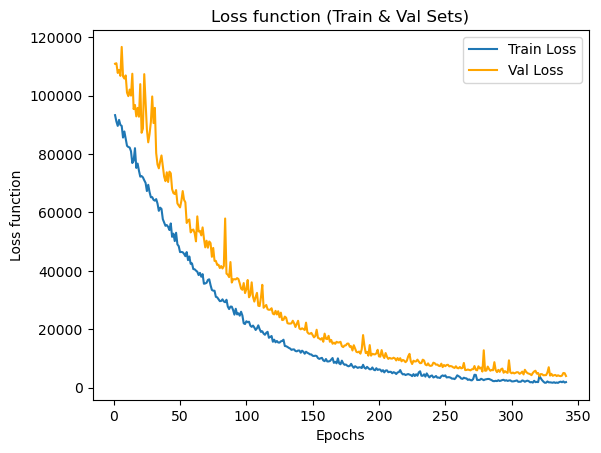

In [473]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1, len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs, loss_function, label='Train Loss')
plt.plot(epochs, val_loss_function, color='orange', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

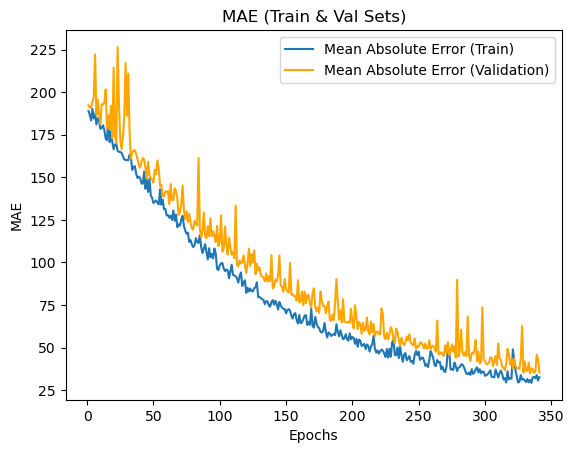

In [474]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1, len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs, mae, label='Mean Absolute Error (Train)')
plt.plot(epochs, val_mae, color='orange', label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [475]:
results = regressor.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 2965.9402 - mae: 35.3731


In [476]:
y_test

6901      3540
4670      7372
6134     10914
2480     10781
8744      4837
         ...  
5834       688
10531    15046
1912     12806
6279      2744
3881     10903
Name: TOTALBTUCOL, Length: 995, dtype: int64

In [477]:
x_test_pattern = X_test[2, :]
y_pred = regressor.predict(x_test_pattern.reshape(1, -1))
print(y_pred[0])

1/1 [==============================] - 0s 42ms/step
[10964.977]


In [478]:
original_features = min_max_scaler.inverse_transform(x_test_pattern.reshape(1, -1))
original_features

array([[3.00000000e+00, 7.00000000e+00, 2.10000000e+01, 4.61011000e+02,
        4.61000000e+02, 3.19867000e+03, 1.09138550e+04, 3.02000000e+02,
        7.16000000e+03, 0.00000000e+00, 8.10162822e+03, 1.53600000e+03,
        1.00000000e+00, 1.00000000e+00, 2.25600000e+03, 9.28817000e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.00000000e+01,
        1.53600000e+03, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 9.29000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09852000e+03,
        7.16014700e+03, 0.00000000e+00, 0.00000000e+00, 4.00000000e+02,
        2.25600000e+03, 1.00000000e+00, 3.02451000e+02, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+02, 1.93600000e+03, 1.53600000e+03, 0.000000

In [479]:
x_test_pattern

array([0.5       , 0.66666667, 0.76923077, 0.05960983, 0.05964549,
       0.0523986 , 0.05239854, 0.03259931, 0.017862  , 0.        ,
       0.17477496, 0.10244189, 0.        , 0.1       , 0.11532785,
       0.09676711, 0.        , 0.        , 0.        , 0.66666667,
       0.1055247 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06945639, 0.        , 0.        , 0.        ,
       0.        , 0.15159057, 0.1515907 , 0.        , 0.        ,
       0.05270787, 0.0682907 , 0.        , 0.22387924, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.42857143,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0514668 , 0.09331459, 0.07118102,
       0.        , 0.        , 0.        , 0.        , 0.2       ,
       0.        , 0.        , 0.        , 0.13333333, 0.        ,
       0.04603602, 0.        , 0.        , 0.        , 0.        ,
       0.20628734, 0.2004597 , 0.20045939, 0.19047619, 1.     

In [480]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

32/32 [==============================] - 0s 3ms/step


In [482]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 2965.943409928921
MAE: 35.37308412484787
R2: 0.9999680086203401
